In [79]:
import numpy as np
from matplotlib import pyplot as plt
import random 
import warnings

# Loading the dataset using loadtxt function
df = np.loadtxt('dataset', usecols=range(1,301))
sample_nos = df.shape[0]
warnings.filterwarnings("ignore")

def distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [80]:
def calc_centroids(data,k):
    centroids = data[np.random.choice(sample_nos, k, replace=False)]
    return centroids

In [81]:
def calc_distance(data,k,centers):
     distance_values = np.zeros((sample_nos,k))
     distance_values = [[((dataset - center) ** 2).sum() for center in centers] for dataset in data]
     return distance_values

In [82]:
def kmeans (data, k, max_iterations=100):
    np.random.seed(50)
    closest = np.zeros(sample_nos).astype(int)
    centroids = calc_centroids(data,k)

    while True:
        for i in range(max_iterations):
            distance_values = calc_distance(data,k,centroids)
            prev_closest = closest.copy()
            closest = np.argmin(distance_values, axis=1)

            for i in range(k):
                centroids[i,:] = data[closest == i].mean(axis = 0)
            if all(closest == prev_closest):
                    break
        return closest, centroids


In [83]:
def plot(principal,closest, centers):
    plt.scatter(principal[:, 0], principal[:, 1], c=closest, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()


In [84]:
def pca_conversion(data, nComponents):
   # Center the data by subtracting the mean along each column
    mean = np.mean(data, axis=0)
    data = data - mean

    # Calculate the covariance matrix of the centered data
    covariance_matrix = np.cov(data.T)

    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)

    sorted_eigenpairs = [(np.abs (eigenValues [i]), eigenVectors[:, i]) for i in range(len(eigenValues))]
    sorted_eigenpairs.sort(reverse=True)
    # Select the top nComponents eigenvectors as the principal components
    selected_eigenvectors = np.array([sorted_eigenpairs [i][1] for i in range (nComponents)])
    pca_dataset = np. dot (data, selected_eigenvectors.T)
    return pca_dataset

In [85]:
# max_iterations = 100
# nComponents = 2
# pca_data = pca_conversion (df, nComponents)
# labels, centers = kmeans(pca_data, 5)
# print(labels)
# print(centers)
# plot(pca_data, labels, centers)

In [86]:
def k_means_plus_plus_clustering(data, k, max_iterations=100):
    d = data.shape[1]    # Dimension of data points

    # Step 1: Select the first cluster representative randomly
    centroids = np.zeros((k, d))
    index = np.random.choice(sample_nos)
    centroids[0] = data[index]

    # Step 2: Select the remaining cluster representatives using the k-means++ algorithm
    for j in range(1, k):
        distances = np.zeros(sample_nos)
        for i in range(sample_nos):
            distances[i] = np.min(np.linalg.norm(data[i] - centroids[:j], axis=1))
        probabilities = distances / np.sum(distances)
        index = np.random.choice(sample_nos, p=probabilities)
        centroids[j] = data[index]

    # Step 3: Assign each data point to the closest cluster representative
    clusters = np.zeros(sample_nos)
    for i in range(sample_nos):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        clusters[i] = np.argmin(distances)

    # Step 4: Update cluster representatives to the centroid of the data points in each cluster
    for j in range(k):
        centroids[j] = np.mean(data[clusters == j], axis=0)

    for i in range(max_iterations):
    # Step 5: Repeat steps 3 and 4 until convergence
        while True:
            prev_clusters = np.copy(clusters)
            for i in range(sample_nos):
                distances = np.linalg.norm(data[i] - centroids, axis=1)
                clusters[i] = np.argmin(distances)
            for j in range(k):
                centroids[j] = np.mean(data[clusters == j], axis=0)
            if np.array_equal(clusters, prev_clusters):
                break

    return clusters, centroids


In [ ]:
def silhouette_score(data, labels):
    n = len(data)
    k = len(np.unique(labels))

    # Calculate the average distance from each point to all other points in its cluster
    a = np.zeros(n)
    for i in range(n):
        cluster_idx = labels[i]
        cluster_points = data[labels == cluster_idx]
        a[i] = np.mean(np.linalg.norm(data[i] - cluster_points, axis=1))

    # Calculate the average distance from each point to all points in the nearest neighboring cluster
    b = np.zeros(n)
    for i in range(n):
        cluster_idx = labels[i]
        other_clusters = [j for j in range(k) if j != cluster_idx]
        min_distance = float('inf')
        for j in other_clusters:
            cluster_points = data[labels == j]
            distance = np.mean(np.linalg.norm(data[i] - cluster_points, axis=1))
            if distance < min_distance:
                min_distance = distance
        b[i] = min_distance

    # Calculate the Silhouette coefficient for each point
    s = np.zeros(n)
    for i in range(n):
        s[i] = (b[i] - a[i]) / max(a[i], b[i])

    # Calculate the mean Silhouette coefficient for all points
    silhouette_coef = np.mean(s)

    return silhouette_coef

# Compute the Silhouette coefficient for each value of k
silhouette_kmean = []
for k in range(1, 10):
    labels, _ = kmeans(df, k)
    score = silhouette_score(df, labels)
    silhouette_kmean.append(score)


# Compute the Silhouette coefficient for each value of k
silhouette_kmeanpp = []
for k in range(1, 10):
    labels, _ = k_means_plus_plus_clustering(df, k)
    score = silhouette_score(df, labels)
    silhouette_kmeanpp.append(score)

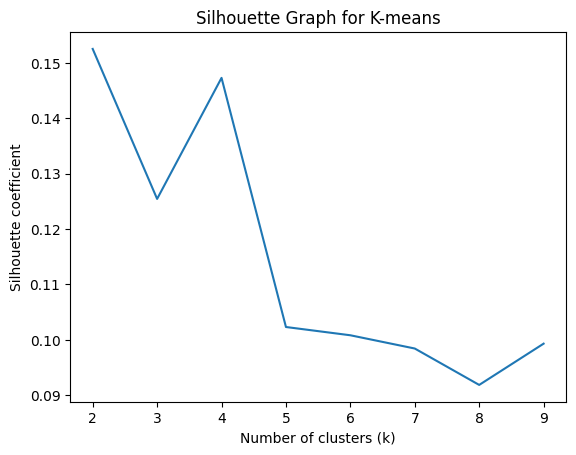

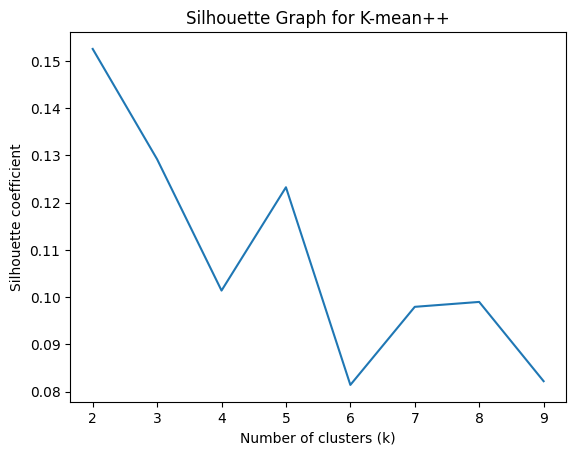

In [ ]:


# Plot the Silhouette coefficient for each value of k
plt.plot(range(1, 10), silhouette_kmean)
plt.title('Silhouette Graph for K-means')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette coefficient")
plt.show()

# Plot the Silhouette coefficient for each value of k
plt.plot(range(1, 10), silhouette_kmeanpp)
plt.title('Silhouette Graph for K-mean++')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette coefficient")
plt.show()

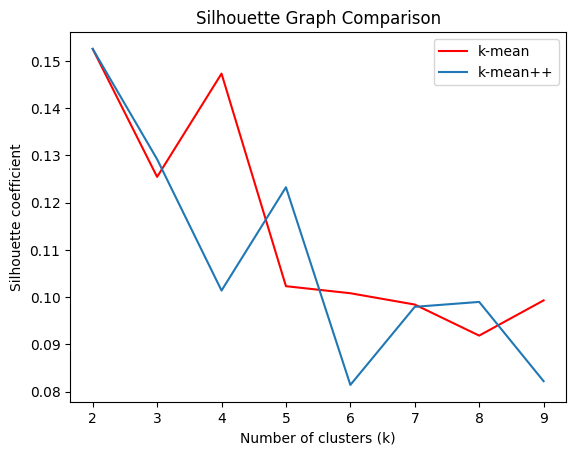

In [ ]:
plt.title('Silhouette Graph Comparison')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette coefficient")
#Plot a simple line chart
plt.plot(range(1, 10), silhouette_kmean, color='r', label='k-mean')

# Plot another line on the same chart/graph
plt.plot(range(1, 10), silhouette_kmeanpp, label='k-mean++')

plt.legend()
plt.show()